In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
vgSales=pd.read_csv('../input/videogamesales/vgsales.csv', index_col='Rank')

In [4]:
vgSales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
vgSales.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
vgSales[vgSales['Year'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


In [7]:
cols2drop=['Name', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']
vgSales.drop(cols2drop, axis=1, inplace=True)

In [8]:
vgSales.isna().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [9]:
vgSales['Year']=vgSales['Year'].fillna(vgSales['Year'].mean())

In [10]:
vgSales.isna().sum()

Platform         0
Year             0
Genre            0
Publisher       58
Global_Sales     0
dtype: int64

In [11]:
vgSales=vgSales.dropna(axis=0)

In [12]:
vgSales.isna().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [13]:
vgSales

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [14]:
vgSales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
vgSales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
counts = vgSales['Publisher'].value_counts()
vgSales['Publisher'] = vgSales['Publisher'].apply(lambda x: 'Small Publisher' if counts[x]<50 else x)

In [17]:
vgSales['Publisher'].value_counts()

Small Publisher           3342
Electronic Arts           1351
Activision                 975
Namco Bandai Games         932
Ubisoft                    921
                          ... 
Focus Home Interactive      58
Marvelous Interactive       56
SquareSoft                  52
Empire Interactive          52
Kadokawa Shoten             50
Name: Publisher, Length: 47, dtype: int64

In [18]:
#pd.get_dummies(vgSales['Platform']) #Outputs One Hot Encoding for a column

In [19]:
oneHotCols = ['Platform', 'Genre', 'Publisher']

In [20]:
def oneHotEncode(data, columns):
    for column in columns:
        dummies=pd.get_dummies(data[column])
        data=pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [21]:
vgSales=oneHotEncode(vgSales, oneHotCols)

In [22]:
vgSales

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,505 Games,5pb,Acclaim Entertainment,Activision,Atari,Atlus,Banpresto,Bethesda Softworks,Capcom,Codemasters,Crave Entertainment,D3Publisher,Deep Silver,Disney Interactive Studios,Eidos Interactive,Electronic Arts,Empire Interactive,Focus Home Interactive,Hudson Soft,Idea Factory,Ignition Entertainment,Infogrames,Kadokawa Shoten,Konami Digital Entertainment,LucasArts,Majesco Entertainment,Marvelous Interactive,Microsoft Game Studios,Midway Games,Namco Bandai Games,Nintendo,Nippon Ichi Software,Rising Star Games,Sega,Small Publisher,Sony Computer Entertainment,Square Enix,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985.0,40.24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2008.0,35.82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2009.0,33.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1996.0,31.37,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0.01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
y=vgSales['Global_Sales']
X=vgSales.drop('Global_Sales', axis=1)
y

Rank
1        82.74
2        40.24
3        35.82
4        33.00
5        31.37
         ...  
16596     0.01
16597     0.01
16598     0.01
16599     0.01
16600     0.01
Name: Global_Sales, Length: 16540, dtype: float64

 > # **Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,-0.070070,-0.090035,-0.013469,-0.177827,-0.056159,-0.387155,-0.077203,-0.224853,-0.186507,-0.040436,-0.007776,-0.140235,-0.077203,-0.026945,-0.247404,-0.007776,-0.27881,-0.387464,-0.295223,-0.143999,-0.28107,-0.159631,-0.102811,-0.01905,-0.121085,-0.010997,-0.01905,3.390051,-0.093387,-0.287283,-0.228977,-0.114219,-0.500094,-0.289865,-0.232177,-0.33979,-0.237621,-0.190803,-0.285677,-0.314184,-0.293039,-0.234625,2.461570,-0.206745,-0.108372,-0.060841,-0.106065,-0.250281,-0.149797,-0.063775,-0.066582,-0.065659,-0.153552,-0.096307,-0.065659,-0.106065,-0.086202,-0.115569,-0.110073,-0.298238,-0.056159,-0.059321,-0.070152,-0.08866,-0.060841,-0.061340,-0.055065,-0.230145,-0.073967,-0.074789,-0.058286,-0.107512,-0.110073,-0.244362,4.746339,-0.07993,-0.072296,-0.200465,-0.503210,-0.207539,-0.119534,-0.056159,-0.21256,-0.160029,-0.144436,-0.24283,-0.111471,-0.06134,-0.100073,-0.119273,-0.079546
1,-3.698162,-0.090035,-0.013469,-0.177827,-0.056159,-0.387155,-0.077203,-0.224853,-0.186507,-0.040436,-0.007776,-0.140235,12.952819,-0.026945,-0.247404,-0.007776,-0.27881,-0.387464,-0.295223,-0.143999,-0.28107,-0.159631,-0.102811,-0.01905,-0.121085,-0.010997,-0.01905,-0.294981,-0.093387,-0.287283,-0.228977,-0.114219,-0.500094,-0.289865,-0.232177,-0.33979,4.208373,-0.190803,-0.285677,-0.314184,-0.293039,-0.234625,-0.406245,-0.206745,-0.108372,-0.060841,-0.106065,-0.250281,-0.149797,-0.063775,-0.066582,-0.065659,-0.153552,-0.096307,-0.065659,-0.106065,-0.086202,-0.115569,-0.110073,-0.298238,-0.056159,-0.059321,-0.070152,-0.08866,-0.060841,-0.061340,-0.055065,-0.230145,-0.073967,-0.074789,-0.058286,-0.107512,-0.110073,-0.244362,4.746339,-0.07993,-0.072296,-0.200465,-0.503210,-0.207539,-0.119534,-0.056159,-0.21256,-0.160029,-0.144436,-0.24283,-0.111471,-0.06134,-0.100073,-0.119273,-0.079546
2,0.275463,-0.090035,-0.013469,-0.177827,-0.056159,-0.387155,-0.077203,-0.224853,-0.186507,-0.040436,-0.007776,-0.140235,-0.077203,-0.026945,-0.247404,-0.007776,-0.27881,-0.387464,-0.295223,-0.143999,-0.28107,-0.159631,-0.102811,-0.01905,-0.121085,-0.010997,-0.01905,3.390051,-0.093387,-0.287283,-0.228977,-0.114219,-0.500094,-0.289865,-0.232177,-0.33979,-0.237621,-0.190803,3.500458,-0.314184,-0.293039,-0.234625,-0.406245,-0.206745,-0.108372,-0.060841,-0.106065,-0.250281,-0.149797,-0.063775,-0.066582,-0.065659,-0.153552,-0.096307,-0.065659,-0.106065,-0.086202,-0.115569,-0.110073,-0.298238,-0.056159,-0.059321,-0.070152,-0.08866,-0.060841,-0.061340,-0.055065,-0.230145,-0.073967,-0.074789,-0.058286,-0.107512,-0.110073,-0.244362,4.746339,-0.07993,-0.072296,-0.200465,-0.503210,-0.207539,-0.119534,-0.056159,-0.21256,-0.160029,-0.144436,-0.24283,-0.111471,-0.06134,-0.100073,-0.119273,-0.079546
3,0.448229,-0.090035,-0.013469,-0.177827,-0.056159,-0.387155,-0.077203,-0.224853,-0.186507,-0.040436,-0.007776,-0.140235,-0.077203,-0.026945,-0.247404,-0.007776,-0.27881,-0.387464,-0.295223,-0.143999,-0.28107,-0.159631,-0.102811,-0.01905,-0.121085,-0.010997,-0.01905,3.390051,-0.093387,-0.287283,-0.228977,-0.114219,-0.500094,-0.289865,-0.232177,-0.33979,-0.237621,-0.190803,-0.285677,-0.314184,-0.293039,-0.234625,2.461570,-0.206745,-0.108372,-0.060841,-0.106065,-0.250281,-0.149797,-0.063775,-0.066582,-0.065659,-0.153552,-0.096307,-0.065659,-0.106065,-0.086202,-0.115569,-0.110073,-0.298238,-0.056159,-0.059321,-0.070152,-0.08866,-0.060841,-0.061340,-0.055065,-0.230145,-0.073967,-0.074789,-0.058286,-0.107512,-0.110073,-0.244362,4.746339,-0.07993,-0.072296,-0.200465,-0.503210,-0.207539,-0.119534,-0.056159,-0.21256,-0.160029,-0.144436,-0.24283,-0.111471,-0.06134,-0.100073,-0.119273,-0.079546
4,-1.797732,-0.090035,-0.013469,-0.177827,-0.056159,-0.387155,12.952819,-0.224853,-0.186507,-0.040436,-0.007776,-0.140235,-0.077203,-0.026945

In [25]:
X.shape

(16540, 91)

> # **Training**

In [26]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow_addons.metrics import RSquare

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [28]:
inputs = tf.keras.Input(shape=(91,))
x=tf.keras.layers.Dense(128, activation='relu',)(inputs)
x=tf.keras.layers.Dense(128, activation='relu',)(x)
outputs=tf.keras.layers.Dense(1)(x)

model=tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer=tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer, loss='mse')

batch_size=64
epochs=18

history=model.fit(X_train, y_train, validation_split=0.2,
        batch_size=batch_size, epochs=epochs, verbose=0)


2022-05-16 20:13:31.513551: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-16 20:13:31.677452: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


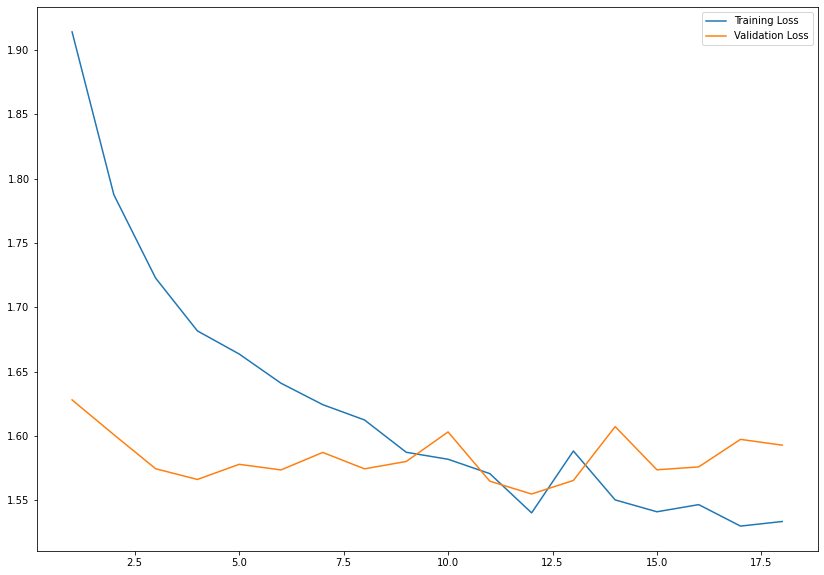

In [29]:
plt.figure(figsize=(14,10))
epochs_range=range(1, epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.xlabel=("Epochs")
plt.ylabel=("Loss")
plt.legend()

plt.show()